<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [521]:
#Importation de la librairie Pandas
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [522]:
#Importation du fichier population.csv
population = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projet 4/data/population.csv')
#population = pd.read_csv('G:/Openclassroom formation data analyste/Projet 4 Réaliser une étude de santé en python/3 - Livrable/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_ali = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projet 4/data/dispo_alimentaire.csv')
#dispo_ali = pd.read_csv('G:/Openclassroom formation data analyste/Projet 4 Réaliser une étude de santé en python/3 - Livrable/dispo_alimentaire.csv')
#Importation du fichier aide_alimentaire.csv
aide_ali = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projet 4/data/aide_alimentaire.csv')
#aide_ali = pd.read_csv('G:/Openclassroom formation data analyste/Projet 4 Réaliser une étude de santé en python/3 - Livrable/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutri = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projet 4/data/sous_nutrition.csv')
#sous_nutri = pd.read_csv('G:/Openclassroom formation data analyste/Projet 4 Réaliser une étude de santé en python/3 - Livrable/sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [523]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [524]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [525]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [526]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'].multiply(1000)

In [527]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'population'}, inplace=True)

In [528]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [529]:
#Afficher les dimensions du dataset
dispo_ali.shape

(15605, 18)

In [530]:
#Consulter le nombre de colonnes
dispo_ali.shape[1]

18

In [531]:
#Affichage les 5 premières lignes de la table
dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [532]:
#remplacement des NaN dans le dataset par des 0
dispo_ali = dispo_ali.fillna(0)

In [533]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes = ['Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock','Aliments pour animaux','Autres Utilisations']
dispo_ali[colonnes] = dispo_ali[colonnes].multiply(1000)

In [534]:
#Affichage les 5 premières lignes de la table
dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [535]:
#Afficher les dimensions du dataset
aide_ali.shape

(1475, 4)

In [536]:
#Consulter le nombre de colonnes
aide_ali.shape[1]

4

In [537]:
#Affichage les 5 premières lignes de la table
aide_ali.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [538]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_ali.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [539]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_ali['Valeur'] = aide_ali['Valeur'].multiply(1000)

In [540]:
#Affichage les 5 premières lignes de la table
aide_ali.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [541]:
#Afficher les dimensions du dataset
sous_nutri.shape

(1218, 3)

In [542]:
#Consulter le nombre de colonnes
sous_nutri.shape[1]

3

In [543]:
#Afficher les 5 premières lignes de la table
sous_nutri.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [544]:
#Conversion de la colonne sous nutrition en numérique
sous_nutri['Valeur'] = pd.to_numeric(sous_nutri['Valeur'], errors = 'coerce')

In [545]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0

sous_nutri['Valeur'] = sous_nutri['Valeur'].fillna(0)


In [546]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutri.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [547]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutri['sous_nutrition'] = sous_nutri['sous_nutrition'].multiply(1000000)

In [548]:
#Afficher les 5 premières lignes de la table
sous_nutri.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [549]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population['Année'] = population['Année'].astype(str)
jointure_popu_sousnutri = pd.merge(population, sous_nutri, how='left', on=['Zone'])
jointure_popu_sousnutri = jointure_popu_sousnutri[jointure_popu_sousnutri['Année_x'] == '2017']
jointure_popu_sousnutri = jointure_popu_sousnutri[jointure_popu_sousnutri['Année_y'].str[:4] == '2017']

In [550]:
#Affichage du dataset
jointure_popu_sousnutri

,Zone,Année_x,population,Année_y,sous_nutrition
29,Afghanistan,2017,36296113.0,2017-2019,11100000.0
65,Afrique du Sud,2017,57009756.0,2017-2019,3300000.0
101,Albanie,2017,2884169.0,2017-2019,100000.0
137,Algérie,2017,41389189.0,2017-2019,1200000.0
173,Allemagne,2017,82658409.0,2017-2019,0.0
...,...,...,...,...,...
7355,Venezuela (République bolivarienne du),2017,29402484.0,2017-2019,9100000.0
7391,Viet Nam,2017,94600648.0,2017-2019,6100000.0
7427,Yémen,2017,27834819.0,2017-2019,0.0
7463,Zambie,2017,16853599.0,2017-2019,0.0


In [551]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
nb_personne_sous_nutri = round(sum(jointure_popu_sousnutri['sous_nutrition']))
popu_mondiale = sum(jointure_popu_sousnutri['population'])
pourcent = (nb_personne_sous_nutri*100)/popu_mondiale
#info : estimation en 2021 d'après l'ONU : 828 millions (150 millions de plus qu'en 2019)
print("Nombre de personnes en sous-nutrition : {}".format(nb_personne_sous_nutri))
print ("c'est à dire", round(pourcent,2), "% de la population mondiale")
print ('pour une population mondiale de ', round(popu_mondiale))

Nombre de personnes en sous-nutrition : 544200000
c'est à dire 7.21 % de la population mondiale
pour une population mondiale de  7543798779


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [552]:
#Combien mange en moyenne un être humain ? Source => 2400 Kcal par jour source ANSES, institut of health

In [553]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
joint_population_dispoali = pd.merge(population, dispo_ali, how='inner', on='Zone')
joint_population_dispoali = joint_population_dispoali[joint_population_dispoali['Année']=='2017']

In [554]:
#Affichage du nouveau dataframe
joint_population_dispoali

,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92399,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000.0,0.0,6000.0,37000.0,0.0,32000.0,0.0,0.0,0.0
92400,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000.0,0.0,6000.0,70000.0,0.0,64000.0,0.0,0.0,0.0
92401,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000.0,7.0,2.29,0.21,1.12,34000.0,3000.0,1000.0,32000.0,0.0,36000.0,0.0,0.0,0.0
92402,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000.0,0.0,2000.0,4000.0,0.0,2000.0,0.0,0.0,0.0


In [555]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
joint_population_dispoali['kcal_dispo_monde'] = joint_population_dispoali['population'] * joint_population_dispoali['Disponibilité alimentaire (Kcal/personne/jour)']
joint_population_dispoali



,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,kcal_dispo_monde
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,181480565.0
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,36296113.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92399,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,...,37000.0,0.0,6000.0,37000.0,0.0,32000.0,0.0,0.0,0.0,341678280.0
92400,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,...,70000.0,0.0,6000.0,70000.0,0.0,64000.0,0.0,0.0,0.0,242022115.0
92401,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000.0,7.0,2.29,0.21,...,34000.0,3000.0,1000.0,32000.0,0.0,36000.0,0.0,0.0,0.0,99656165.0
92402,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,4000.0,0.0,2000.0,4000.0,0.0,2000.0,0.0,0.0,0.0,14236595.0


In [556]:
#Calcul du nombre d'humains pouvant être nourris
nbpop = round((joint_population_dispoali['kcal_dispo_monde'].sum()) / 2400)
message = "Nombre d'humains pouvant en théorie être nourris: {}".format(nbpop)
print(message)

Nombre d'humains pouvant en théorie être nourris: 8716243595


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [557]:
#Transfert des données avec les végétaux dans un nouveau dataframe
origin_vegetal=joint_population_dispoali.where (joint_population_dispoali['Origine']=='vegetale')
origin_vegetal

,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,kcal_dispo_monde
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,36296113.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92402,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,4000.0,0.0,2000.0,4000.0,0.0,2000.0,0.0,0.0,0.0,14236595.0


In [558]:
#Calcul du nombre de kcal disponible pour les végétaux
nbkcalvégétaux = round((origin_vegetal['kcal_dispo_monde'].sum()) )
nbkcalvégétaux

17260764211501

In [559]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nbpop_vege=(round(nbkcalvégétaux/2400))
message = "Nombre d'humains pouvant en théorie être nourris avec des végétaux: {}".format(nbpop_vege)
print(message)

Nombre d'humains pouvant en théorie être nourris avec des végétaux: 7191985088


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [560]:
#Calcul de la disponibilité totale
dispo_total = round(joint_population_dispoali['Disponibilité intérieure'].sum())
print ('La disponibilité intérieure mondiale est de ', dispo_total)

La disponibilité intérieure mondiale est de  9733927000


In [561]:
joint_population_dispoali.reset_index(drop=True, inplace=True)


In [562]:
joint_population_dispoali

,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,kcal_dispo_monde
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,...,37000.0,0.0,6000.0,37000.0,0.0,32000.0,0.0,0.0,0.0,341678280.0
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,...,70000.0,0.0,6000.0,70000.0,0.0,64000.0,0.0,0.0,0.0,242022115.0
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000.0,7.0,2.29,0.21,...,34000.0,3000.0,1000.0,32000.0,0.0,36000.0,0.0,0.0,0.0,99656165.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,4000.0,0.0,2000.0,4000.0,0.0,2000.0,0.0,0.0,0.0,14236595.0


In [563]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,

dispoint=0
perte = 0
prod = 0
nourriture = 0
alim_animaux = 0
semence=0
traitement=0
autre_util=0
stock=0
importa =0
exporta =0

for i in range(0,len(joint_population_dispoali['Zone'])):
   dispoint +=float(joint_population_dispoali.loc[i,'Disponibilité intérieure'])
   prod +=float(joint_population_dispoali.loc[i,'Production'])
   perte +=float(joint_population_dispoali.loc[i,'Pertes'])
   nourriture += float(joint_population_dispoali.loc[i,'Nourriture'])
   alim_animaux += float(joint_population_dispoali.loc[i,'Aliments pour animaux'])
   semence += float(joint_population_dispoali.loc[i,'Semences'])
   traitement += float(joint_population_dispoali.loc[i,'Traitement'])
   autre_util += float(joint_population_dispoali.loc[i,'Autres Utilisations'])
   stock += float(joint_population_dispoali.loc[i,'Variation de stock'])
   importa += float(joint_population_dispoali.loc[i,'Importations - Quantité'])
   exporta += float(joint_population_dispoali.loc[i,'Exportations - Quantité'])

print ('Disponibilité intérieure totale en 2017=', round(dispoint))

print ('Production totale=', round(prod))

print ('Perte totale=', round(perte))

print ('Nourriture totale=', round(nourriture))

print ('Aliment pour animaux', round(alim_animaux))


print ('Semence totale', round(semence))
print ('traitement totale', round(traitement))
print ('Autre utilisation', round(autre_util))
print ('Stock total', round(stock))
print ('importation total', round(importa))
print ('Exportation total', round(exporta))
print('% des aliments pour animaux dans la disponibilité intérieure =', round((alim_animaux*100)/dispoint),2)
print('% des Pertes =', round((perte*100)/dispoint),2)
print('% de la nourrituree =', round((nourriture*100)/dispoint),2)
print('% semence =', round((semence*100)/dispoint))
print('% Traitement', round((traitement*100)/dispoint))
print('% Stock', round((stock*100)/dispoint))
print('% Autre utilisation', round((autre_util*100)/dispoint))

Disponibilité intérieure totale en 2017= 9733927000
Production totale= 9921364000
Perte totale= 452283000
Nourriture totale= 4805525000
Aliment pour animaux 1288002000
Semence totale 153317000
traitement totale 2185641000
Autre utilisation 858771000
Stock total -102605000
importation total 1247345000
Exportation total 1331999000
% des aliments pour animaux dans la disponibilité intérieure = 13 2
% des Pertes = 5 2
% de la nourrituree = 49 2
% semence = 2
% Traitement 22
% Stock -1
% Autre utilisation 9


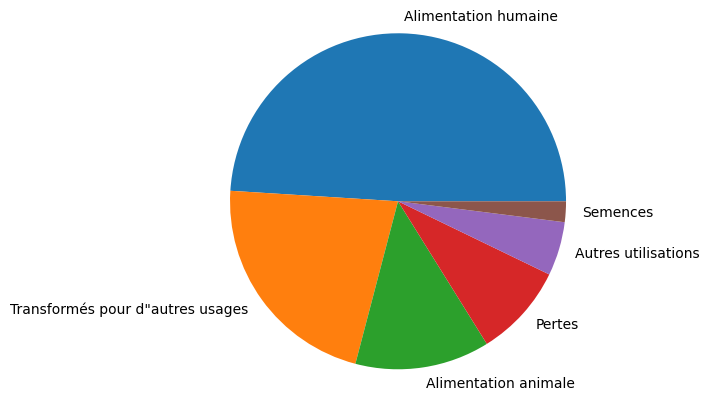

In [564]:
import matplotlib.pyplot as plt
data = [49.2,22, 13, 9, 5.2, 2]
labels = ['Alimentation humaine', 'Transformés pour d"autres usages', 'Alimentation animale','Pertes', 'Autres utilisations', 'Semences', ]
plt.pie(data, labels=labels)
plt.axis('equal')
plt.show()



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [565]:
#Création d'une liste avec toutes les variables
cereale = ['Blé', 'Maïs', 'Orge', 'Avoine', 'Seigle','Sorgho', 'Millet', 'Riz (Eq Blanchi)', 'Quinoa', 'Amarante','Sarrasin', 'Epeautre', 'Céréales, Autres']

In [566]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales = origin_vegetal[origin_vegetal['Produit'].isin(cereale)].groupby (origin_vegetal['Produit']).sum()
cereales.reset_index(inplace=True)
cereales

<ipython-input-566-22fbee5028a1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cereales = origin_vegetal[origin_vegetal['Produit'].isin(cereale)].groupby (origin_vegetal['Produit']).sum()


,Produit,population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,kcal_dispo_monde
0,Avoine,7.124708e+09,15865000.0,206000.0,828.0,142.46,14.34,33.65,22537000.0,3343000.0,3577000.0,3459000.0,508000.0,2.271300e+07,2452000.0,36000.0,-401000.0,1.814306e+10
1,Blé,7.291901e+09,121686000.0,20931000.0,94682.0,12148.21,541.76,2764.65,661667000.0,195274000.0,180627000.0,450581000.0,27259000.0,6.918210e+08,33805000.0,7513000.0,-15513000.0,3.824742e+12
2,"Céréales, Autres",7.256326e+09,18782000.0,1388000.0,1478.0,193.07,5.44,40.37,27193000.0,2501000.0,2854000.0,5308000.0,780000.0,2.810900e+07,1188000.0,158000.0,-1267000.0,4.959109e+10
3,Maïs,7.291901e+09,544746000.0,188824000.0,30878.0,3687.47,271.42,770.54,953202000.0,128312000.0,120342000.0,125000000.0,40633000.0,1.016354e+09,6820000.0,47253000.0,-55183000.0,1.102103e+12
4,Millet,7.252012e+09,3290000.0,196000.0,3966.0,513.09,37.27,96.11,29894000.0,274000.0,326000.0,23040000.0,2276000.0,2.890700e+07,682000.0,403000.0,933000.0,2.070702e+11
5,Orge,7.290658e+09,88798000.0,649000.0,1808.0,262.62,7.32,52.09,134152000.0,39849000.0,38328000.0,6744000.0,4571000.0,1.337760e+08,8537000.0,24863000.0,1900000.0,5.169642e+10
6,Riz (Eq Blanchi),7.291901e+09,33581000.0,18419000.0,52909.0,5373.28,123.71,1025.08,475141000.0,41223000.0,36882000.0,376830000.0,27378000.0,4.954470e+08,12194000.0,6740000.0,-15958000.0,3.958516e+12
7,Seigle,6.952361e+09,8073000.0,10000.0,1869.0,250.91,8.19,48.96,16362000.0,2298000.0,2184000.0,5349000.0,555000.0,1.650000e+07,1253000.0,1120000.0,-26000.0,4.144144e+10
8,Sorgho,7.140994e+09,24794000.0,2049000.0,4952.0,614.02,48.34,146.16,58223000.0,6387000.0,6403000.0,24153000.0,2746000.0,6.211600e+07,788000.0,3695000.0,-3913000.0,2.179542e+11


In [567]:
#simplification du nom de 2 produits
cereales.loc[cereales['Produit'] == 'Riz (Eq Blanchi)', 'Produit'] = 'Riz'
cereales.loc[cereales['Produit'] == 'Céréales, Autres', 'Produit'] = 'Autres'

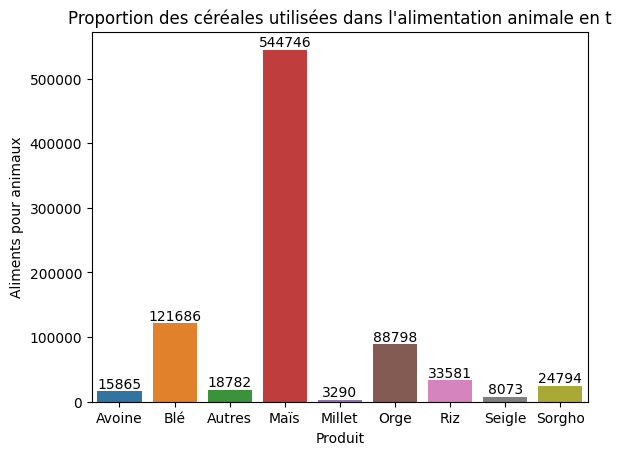

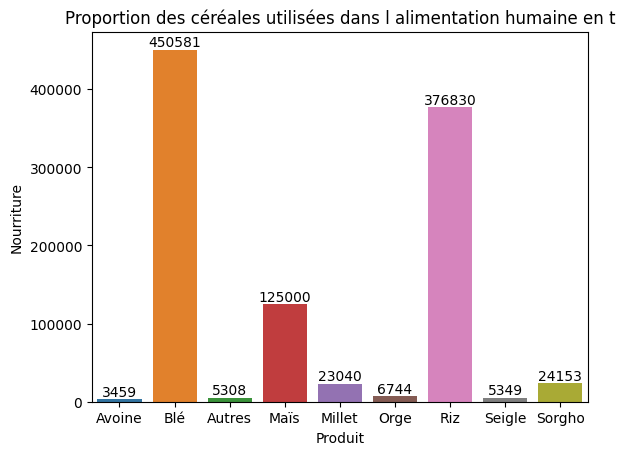

In [568]:
# affichage en graphique en barre de la proportion utilisé pour l'alimentation animale et humaine
import seaborn as sns
cereales['Aliments pour animaux'] = cereales['Aliments pour animaux'].astype(int)
cereales['Nourriture'] = cereales['Nourriture'].astype(int)
cereales['Aliments pour animaux'] = round(cereales['Aliments pour animaux']/1e+03,2)
cereales['Nourriture'] = round(cereales['Nourriture']/1e+03,2)
ax=sns.barplot(data=cereales, x='Produit', y=cereales['Aliments pour animaux'])
ax.set_title ("Proportion des céréales utilisées dans l'alimentation animale en t")
for i in ax.containers:
   ax.bar_label(i)
plt.show()
ax=sns.barplot(data=cereales, x='Produit', y=cereales['Nourriture'])
ax.set_title('Proportion des céréales utilisées dans l alimentation humaine en t')
for i in ax.containers:
   ax.bar_label(i)
plt.show()


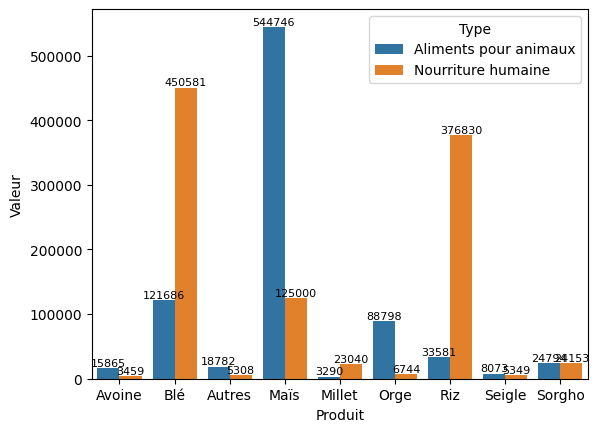

In [569]:
#affichage des donnés sur un seul graphique
data = {
    'Produit': cereales['Produit'],
    'Aliments pour animaux': cereales['Aliments pour animaux'],
    'Nourriture humaine': cereales['Nourriture']
}
df = pd.DataFrame(data)
df = df.melt(id_vars=['Produit'], var_name='Type', value_name='Valeur')
ax = sns.barplot(data=df, x='Produit', y='Valeur', hue='Type')
plt.legend(title='Type')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8)
plt.show()


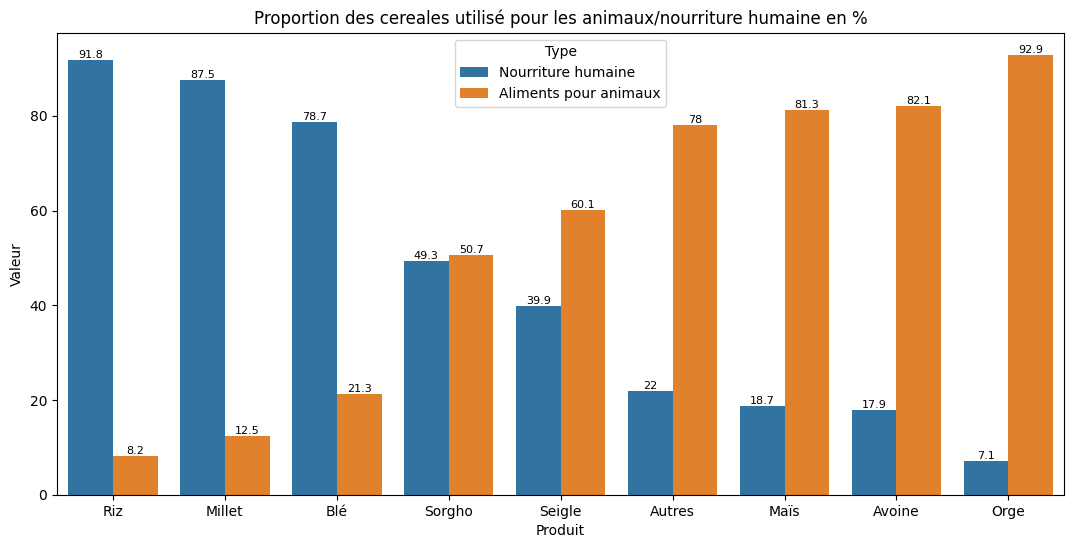

In [570]:
#affichage des donnés sur un seul graphique en %
total_produit = df.groupby('Produit')['Valeur'].sum()
df['Valeur'] = round(df.apply(lambda row: (row['Valeur'] / total_produit[row['Produit']]) * 100, axis=1),1)
df = df.sort_values(by=['Type', 'Valeur'], ascending=[False, False])
plt.figure(figsize=(13, 6))
ax = sns.barplot(data=df, x='Produit', y='Valeur', hue='Type')
plt.legend(title='Type')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8)
plt.title('Proportion des cereales utilisé pour les animaux/nourriture humaine en %')
plt.show()

In [571]:
#Affichage de la proportion d'alimentation animale
total_cereales_animaux = sum(cereales['Aliments pour animaux'])
total_cereales_humaine = sum(cereales['Nourriture'])
proportion_ani =  round((total_cereales_animaux * 100)/ (total_cereales_animaux+total_cereales_humaine),2)
proportion_ani

45.72

In [572]:
#Affichage de la proportion d'alimentation animale(humaine ?)
proportion_hum = 100-proportion_ani
proportion_hum

54.28

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [573]:
#Création de la colonne proportion par pays
jointure_popu_sousnutri['propor_par_pays'] = round(((jointure_popu_sousnutri['sous_nutrition']/jointure_popu_sousnutri['population'])*100),2)
jointure_popu_sousnutri

,Zone,Année_x,population,Année_y,sous_nutrition,propor_par_pays
29,Afghanistan,2017,36296113.0,2017-2019,11100000.0,30.58
65,Afrique du Sud,2017,57009756.0,2017-2019,3300000.0,5.79
101,Albanie,2017,2884169.0,2017-2019,100000.0,3.47
137,Algérie,2017,41389189.0,2017-2019,1200000.0,2.90
173,Allemagne,2017,82658409.0,2017-2019,0.0,0.00
...,...,...,...,...,...,...
7355,Venezuela (République bolivarienne du),2017,29402484.0,2017-2019,9100000.0,30.95
7391,Viet Nam,2017,94600648.0,2017-2019,6100000.0,6.45
7427,Yémen,2017,27834819.0,2017-2019,0.0,0.00
7463,Zambie,2017,16853599.0,2017-2019,0.0,0.00


In [574]:
# réduction des noms des pays pour le graphique
jointure_popu_sousnutri['Zone'] =jointure_popu_sousnutri['Zone'].replace(['Venezuela (République bolivarienne du)', 'République populaire démocratique de Corée'],['Vénézuela','Corée du nord'])


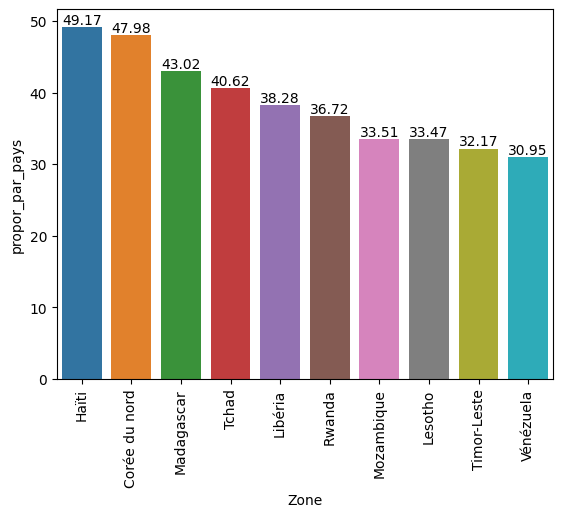

In [575]:
#affichage après trie des 10 pires pays
jointure_popu_sousnutri=jointure_popu_sousnutri.sort_values('propor_par_pays', ascending=False)
jointure_popu_sousnutri.head(10)

sns.barplot(data=jointure_popu_sousnutri.head(10), x='Zone', y='propor_par_pays')
ax = plt.gca()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
for i in ax.containers:
   ax.bar_label(i,)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [576]:
#calcul du total de l'aide alimentaire par pays
#aide_ali
aide_ali_pays = aide_ali.groupby('Zone')[['Valeur']].sum()
aide_ali_pays.reset_index(inplace=True)
aide_ali_pays

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


In [577]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_ali_pays = aide_ali_pays.sort_values('Valeur', ascending=False)
aide_ali_pays.head(10)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


In [578]:
#réduction des nom des pays pour le graphique
aide_ali_pays['Zone'] = aide_ali_pays['Zone'].replace(['République arabe syrienne', 'République démocratique du Congo'],['Syrie','R.D. Congo'])

In [579]:
# suppression du e+09 pour un meilleur affichage des valeurs sur le graphique
aide_ali_pays['Valeur'] = round((aide_ali_pays['Valeur']/1e+09),2)


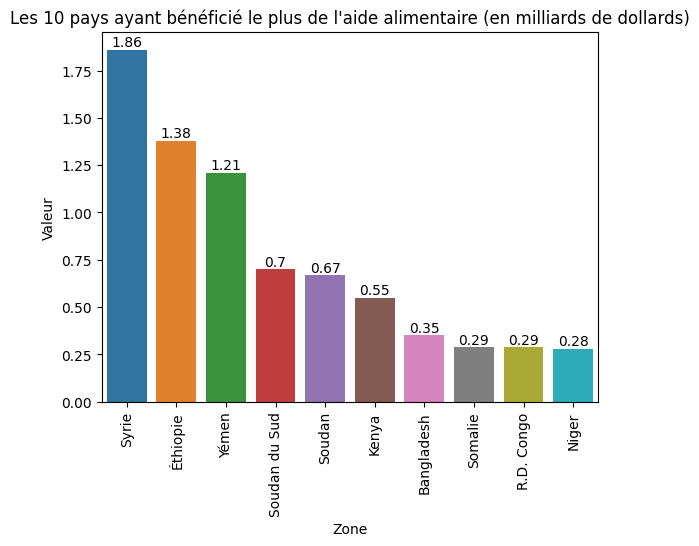

In [580]:
sns.barplot(data=aide_ali_pays.head(10), x='Zone', y='Valeur')
ax = plt.gca()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
for i in ax.containers:
   ax.bar_label(i)

ax.set_title("Les 10 pays ayant bénéficié le plus de l'aide alimentaire (en milliards de dollards)")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [581]:
#Création d'un dataframe avec la zone, l'année et l'aide alimenta'ire puis groupby sur zone et année
aide_ali2= aide_ali[['Zone', 'Année', 'Valeur']] #pas besoin de faire un filtage sur année pour avoir les valeurs entre 2013 et 2016
aide_ali2=aide_ali2.groupby(['Zone', 'Année']).sum()
aide_ali2 = aide_ali2.reset_index()

aide_ali2

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [582]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
top5_aide_ali = ['République arabe syrienne','Éthiopie','Yémen','Soudan du Sud', 'Soudan']

In [583]:
#On filtre sur le dataframe avec notre liste
top5_beneficiaire_ali = aide_ali2[aide_ali2['Zone'].isin(top5_aide_ali)]

In [584]:
#réduction des noms de pays pour le graphique
top5_beneficiaire_ali['Zone'] = top5_beneficiaire_ali['Zone'].replace(['République arabe syrienne'],['Syrie'])

<ipython-input-584-25f9fd0909a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_beneficiaire_ali['Zone'] = top5_beneficiaire_ali['Zone'].replace(['République arabe syrienne'],['Syrie'])


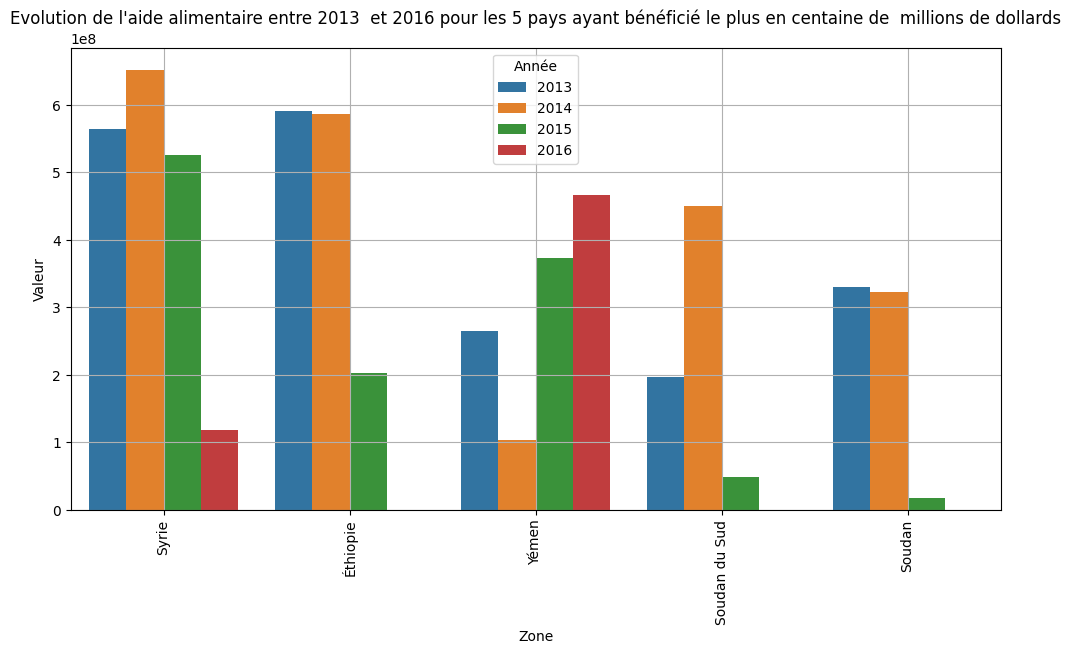

In [585]:
# Affichage des pays avec l'aide alimentaire par année
somme_valeur = top5_beneficiaire_ali.groupby('Zone')['Valeur'].sum().reset_index()
zones_tri = somme_valeur.sort_values(by='Valeur', ascending=False)['Zone'].values
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_beneficiaire_ali, x='Zone', y='Valeur', hue='Année', order=zones_tri)
ax = plt.gca()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
plt.title("Evolution de l'aide alimentaire entre 2013  et 2016 pour les 5 pays ayant bénéficié le plus en centaine de  millions de dollards")
plt.grid()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [586]:
#Calcul de la disponibilité en kcal par personne par jour par pays

dispo_ali_kcal_pays = joint_population_dispoali.groupby('Zone').sum()
dispo_ali_kcal_pays.reset_index()
dispo_ali_kcal_pays

<ipython-input-586-876b1a6aff2f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_ali_kcal_pays = joint_population_dispoali.groupby('Zone').sum()


,population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,kcal_dispo_monde
Zone,,,,,,,,,,,,,,,,,
Afghanistan,2.177767e+09,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0,7.574999e+10
Afrique du Sud,5.415927e+09,5309000.0,876000.0,3020.0,564.80,83.58,85.33,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0,1.721695e+11
Albanie,2.653435e+08,660000.0,174000.0,3188.0,1095.54,106.48,111.37,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0,9.194731e+09
Algérie,3.849195e+09,4352000.0,1707000.0,3293.0,809.13,76.48,91.92,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0,1.362946e+11
Allemagne,7.852549e+09,30209000.0,7711000.0,3503.0,957.52,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0,2.895524e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,8.728227e+08,1174000.0,2689000.0,3275.0,700.24,87.16,104.51,11850000.0,4343000.0,15327000.0,6548000.0,705000.0,1192000.0,3000.0,804000.0,-327000.0,3.107059e+10
Équateur,1.594609e+09,1200000.0,1909000.0,2346.0,544.91,94.64,61.30,18614000.0,8002000.0,1725000.0,8574000.0,707000.0,24337000.0,138000.0,6200000.0,557000.0,3.937846e+10
États-Unis d'Amérique,3.088305e+10,148432000.0,154699000.0,3682.0,1002.39,161.37,109.42,777992000.0,163524000.0,81887000.0,320889000.0,7162000.0,894668000.0,10403000.0,141010000.0,-35032000.0,1.196962e+12


In [587]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
dispo_ali_kcal_pays_trié = dispo_ali_kcal_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
dispo_ali_kcal_pays_trié.reset_index(inplace = True)
dispo_ali_kcal_pays_trié.head(10)

,Zone,population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,kcal_dispo_monde
0,République centrafricaine,3.906620e+08,1000.0,27000.0,1879.0,453.73,59.41,46.04,2582000.0,0.0,76000.0,2092000.0,122000.0,2503000.0,63000.0,278000.0,3000.0,8.635927e+09
1,Zambie,1.567385e+09,408000.0,69000.0,1924.0,350.12,42.05,55.22,10041000.0,675000.0,380000.0,5088000.0,242000.0,10526000.0,76000.0,4178000.0,-182000.0,3.242632e+10
2,Madagascar,2.352487e+09,842000.0,2522000.0,2056.0,425.07,24.49,46.69,15216000.0,236000.0,924000.0,9741000.0,966000.0,14160000.0,375000.0,844000.0,375000.0,5.257297e+10
3,Afghanistan,2.177767e+09,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0,7.574999e+10
4,Haïti,9.554658e+08,481000.0,115000.0,2089.0,397.78,48.92,47.70,6175000.0,15000.0,1204000.0,4101000.0,679000.0,5072000.0,36000.0,762000.0,-77000.0,2.294216e+10
5,République populaire démocratique de Corée,1.551219e+09,816000.0,695000.0,2093.0,458.93,36.41,54.99,14876000.0,83000.0,993000.0,11425000.0,1066000.0,13883000.0,194000.0,678000.0,84000.0,5.322462e+10
6,Tchad,1.096223e+09,104000.0,2000.0,2109.0,319.45,47.10,62.75,5304000.0,0.0,290000.0,4097000.0,459000.0,5153000.0,101000.0,542000.0,-141000.0,3.167033e+10
7,Zimbabwe,1.309767e+09,131000.0,23000.0,2113.0,336.59,57.18,48.32,9507000.0,278000.0,1342000.0,4762000.0,188000.0,7914000.0,76000.0,4330000.0,531000.0,3.008193e+10
8,Ouganda,3.910826e+09,348000.0,68000.0,2126.0,535.58,46.57,52.64,26624000.0,1218000.0,1257000.0,20121000.0,991000.0,26321000.0,154000.0,4982000.0,269000.0,8.752017e+10
9,Timor-Leste,7.583874e+07,9000.0,2000.0,2129.0,369.10,51.08,57.51,447000.0,23000.0,100000.0,419000.0,14000.0,371000.0,2000.0,3000.0,2000.0,2.646896e+09


In [588]:
# correction des noms des pays par des noms plus court pour les graphique
dispo_ali_kcal_pays_trié['Zone'] = dispo_ali_kcal_pays_trié['Zone'].replace(['République centrafricaine', 'République populaire démocratique de Corée', "États-Unis d'Amérique"],['R. centrafique', 'Corée du Nord', 'U.S.A.'])


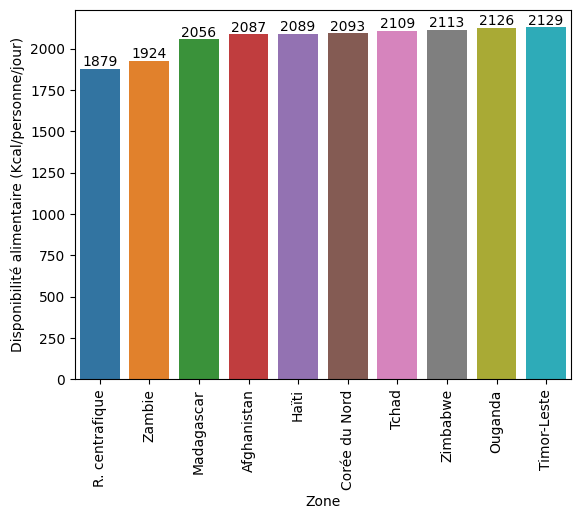

In [589]:
sns.barplot(dispo_ali_kcal_pays_trié.head(10), x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)')
ax = plt.gca()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
for i in ax.containers:
   ax.bar_label(i,)
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [590]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
dispo_ali_kcal_pays_trié.tail(10)

,Zone,population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,kcal_dispo_monde
162,Allemagne,7.852549e+09,30209000.0,7711000.0,3503.0,957.52,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0,2.895524e+11
163,Égypte,9.065604e+09,15084000.0,2262000.0,3518.0,803.79,63.09,103.22,115133000.0,5014000.0,24100000.0,65957000.0,7608000.0,95848000.0,1365000.0,22924000.0,199000.0,3.392850e+11
164,Luxembourg,5.504763e+07,147000.0,11000.0,3540.0,1150.66,141.49,113.64,802000.0,821000.0,1076000.0,607000.0,11000.0,593000.0,9000.0,24000.0,-41000.0,2.095361e+09
165,Italie,5.824675e+09,16144000.0,3228000.0,3578.0,993.20,154.69,108.49,97405000.0,23643000.0,38692000.0,60584000.0,1861000.0,80855000.0,736000.0,14870000.0,1496000.0,2.170905e+11
166,Irlande,4.515615e+08,3758000.0,1120000.0,3602.0,1150.15,125.69,109.91,10738000.0,6828000.0,6254000.0,5320000.0,236000.0,11501000.0,89000.0,399000.0,-192000.0,1.712131e+10
167,Israël,7.501902e+08,2525000.0,801000.0,3610.0,922.14,151.39,128.00,11267000.0,1648000.0,5883000.0,7132000.0,220000.0,6906000.0,71000.0,564000.0,128000.0,2.976029e+10
168,U.S.A.,3.088305e+10,148432000.0,154699000.0,3682.0,1002.39,161.37,109.42,777992000.0,163524000.0,81887000.0,320889000.0,7162000.0,894668000.0,10403000.0,141010000.0,-35032000.0,1.196962e+12
169,Turquie,7.543830e+09,17750000.0,3006000.0,3708.0,968.15,119.64,108.12,131377000.0,14593000.0,12136000.0,72551000.0,12036000.0,137432000.0,2553000.0,23560000.0,-3599000.0,3.007798e+11
170,Belgique,1.084876e+09,5533000.0,3226000.0,3737.0,1002.09,161.95,99.37,29358000.0,30345000.0,35276000.0,11134000.0,564000.0,24496000.0,153000.0,8960000.0,-64000.0,4.267560e+10
171,Autriche,8.378906e+08,3412000.0,1001000.0,3770.0,1069.20,170.44,106.20,19308000.0,6733000.0,8463000.0,9085000.0,459000.0,18129000.0,173000.0,5178000.0,-556000.0,3.325103e+10


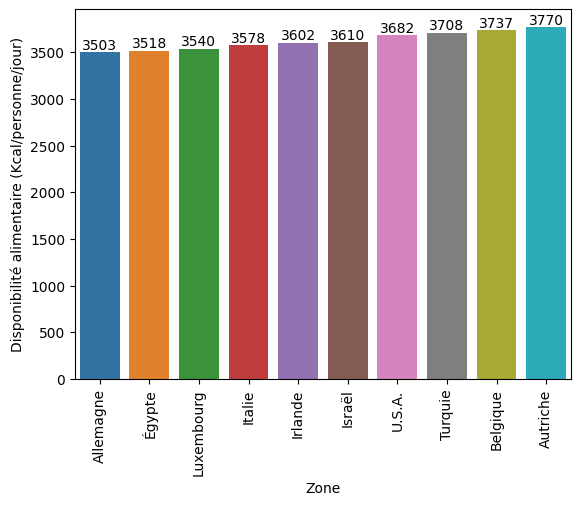

In [591]:
sns.barplot(dispo_ali_kcal_pays_trié.tail(10), x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)')
ax = plt.gca()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
for i in ax.containers:
   ax.bar_label(i,)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [592]:
#création d'un dataframe avec uniquement la Thaïlande
data_thailande = jointure_popu_sousnutri[jointure_popu_sousnutri['Zone']=='Thaïlande']
data_thailande

,Zone,Année_x,population,Année_y,sous_nutrition,propor_par_pays
6887,Thaïlande,2017,69209810.0,2017-2019,6500000.0,9.39


In [593]:
#Calcul de la sous nutrition en Thaïlande
print('Le pourcentage de personnes en sous-nutrition en Thaïlande est de', data_thailande['propor_par_pays'].values[0])


Le pourcentage de personnes en sous-nutrition en Thaïlande est de 9.39


In [594]:
# On calcule la proportion exportée en fonction de la proportion -> produite ?
data_thailande2 = joint_population_dispoali[(joint_population_dispoali['Zone'] == 'Thaïlande') & (joint_population_dispoali['Produit'] == 'Manioc')]
print('le procentage de la production de manioc exportée par la Thailande est de ',round((data_thailande2['Exportations - Quantité'].values[0] *100 / data_thailande2['Production'].values[0]),2))



le procentage de la production de manioc exportée par la Thailande est de  83.41


In [595]:
data_thailande2

,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,kcal_dispo_monde
14166,Thaïlande,2017,69209810.0,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,...,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0,2.768392e+09


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

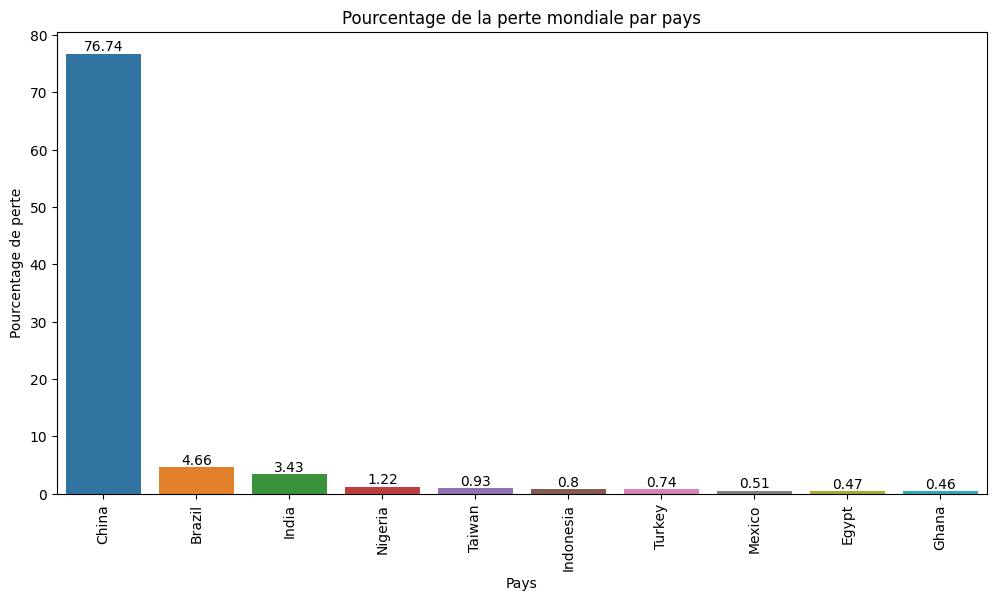

In [606]:
#Etude sur la répartion des des pertes par pays
pays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projet 4/data/dispo_alimentaire3.csv', sep=';', encoding='latin-1')
perte_data = pays[['name', 'Pertes']]
perte_data = perte_data.groupby('name').sum()
perte_data.reset_index(inplace=True)
perte_totale=perte_data['Pertes'].sum()

perte_data['pourcent_perte'] = round((perte_data['Pertes'] * 100) / perte_totale,2)
perte_data.sort_values(by='pourcent_perte', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=perte_data.head(10), x='name', y='pourcent_perte')
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Pourcentage de perte')
plt.title('Pourcentage de la perte mondiale par pays')
for i in ax.containers:
   ax.bar_label(i,)
plt.show()

In [636]:
perte_data.sort_values(by='pourcent_perte', ascending=False, inplace=True)
top_25_data = perte_data.head(5)
somme_perte_pourcent = top_25_data['pourcent_perte'].sum()
somme_perte_kilo = top_25_data['Pertes'].sum()
print('somme des top5 des pertes en % = ', somme_perte_pourcent)
print('somme perte_en kilo = ', somme_perte_kilo)


somme des top5 des pertes en % =  86.98
somme perte_en kilo =  1416431.0


In [624]:
import folium
# Récupération des données
pays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projet 4/data/dispo_alimentaire3.csv', sep=';', encoding='latin-1')
data_pays = pays[['name','Pertes']]
data_pays=data_pays.groupby('name').sum()
data_pays.reset_index(inplace=True)
data_pays['pourcent_perte']= (data_pays['Pertes'] *100)/data_pays['Pertes'].sum()
# Charger le fichier frontières des pays via natural earth
political_countries_url = "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
# creation de la carte choroplèthe
world_map = folium.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")
# Ajout des données choroplèthes pour chaque pays
folium.Choropleth(
    geo_data=political_countries_url,
    name='choropleth',
    data=data_pays,
    columns=['name', 'pourcent_perte'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="Pertes",
    nan_fill_color="white",
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, data_pays['pourcent_perte'].max()],
    highlight=True,
    tooltip = folium.GeoJsonTooltip(fields=['name','pourcent_perte'],
    aliases=['Pays:', 'Pourcentage des pertes:'],
    style="background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
).add_to(world_map)

# Ajout du contrôle des couches à la carte
folium.LayerControl().add_to(world_map)

world_map



Output hidden; open in https://colab.research.google.com to view.

In [633]:
#Meme graphique mais sans la chine pour avoir une legende plus visible
import folium
pays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projet 4/data/dispo_alimentaire3.csv', sep=';', encoding='latin-1')
data_pays = pays[['name', 'Pertes']]
data_pays = data_pays.groupby('name').sum()
data_pays.reset_index(inplace=True)
data_pays['pourcent_perte'] = (data_pays['Pertes'] * 100) / data_pays['Pertes'].sum()
data_pays = data_pays[data_pays['name'] != 'China']
# Charger le fichier shapefile des frontières des pays
political_countries_url = "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
# creation de la carte choroplèthe
world_map = folium.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")
# Tri des valeurs pour les bords des intervalles
bins = [0, 0.2, 0.4, 0.6, 0.8, 1, 4, 5]
# Ajout des données choroplèthes pour chaque pays
folium.Choropleth(
    geo_data=political_countries_url,
    name='choropleth',
    data=data_pays,
    columns=['name', 'pourcent_perte'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name="Pertes",
    nan_fill_color="white",
    bins=bins,
    highlight=True,
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'pourcent_perte'],
        aliases=['Pays:', 'Pourcentage des pertes:'],
        style="background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"
    )
).add_to(world_map)

# Ajout du contrôle des couches à la carte
folium.LayerControl().add_to(world_map)

world_map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
world_map.save("/content/drive/MyDrive/Colab Notebooks/projet 4/data/world_map.html")